# TopoCurve Analysis with FFT Filtering & Curvature Computation
This script processes a GeoTIFF Digital Elevation Model (DEM) file using FFT-based spectral filtering, calculates curvatures, and generates plots for visualization.

1. Import Required Modules

In [1]:
#!pip install topocurve

In [2]:
from topocurve import TopoCurve, SpectralFiltering

import numpy as np
import matplotlib.pyplot as plt

2. Load the DEM File

In [3]:
# Define the path to the TIFF file
tiff_file = '../references/DEM_files/Purgatory.tif'

# Instantiate TopoCurve object
dem = TopoCurve(tiff_file)

# Instantiate SpectralFiltering object
spectral_filter = SpectralFiltering(tiff_file)


3. Apply FFT Filtering and Compute Curvature

In [4]:
# Apply FFT filtering with a lowpass filter at 190-200
dx, dy, filtered_elevation = spectral_filter.FFT([190, 200], 'lowpass', 0)

# Compute curvature attributes
K1, K2, KM, KG = dem.CurveCalc(filtered_elevation, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG):")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG):
[[ 0.00286249  0.00289913  0.00296336 ...  0.00034833  0.00031193
   0.00028517]
 [ 0.00415454  0.00420844  0.00430276 ...  0.00051732  0.00046575
   0.00042766]
 [ 0.00511052  0.00517936  0.00530053 ...  0.00067604  0.000613
   0.00056722]
 ...
 [-0.00321303 -0.00467301 -0.0057523  ...  0.00403775  0.00329353
   0.00226818]
 [-0.00322214 -0.00468644 -0.00539657 ...  0.00398276  0.00325558
   0.00224399]
 [-0.00322926 -0.00372884 -0.00374029 ...  0.00394607  0.00322993
   0.00222762]] [[-0.00155947 -0.0022727  -0.00281701 ... -0.00276806 -0.00225026
  -0.0015554 ]
 [-0.00152521 -0.00222233 -0.00275389 ... -0.00272245 -0.00221231
  -0.0015295 ]
 [-0.00146323 -0.00213199 -0.00264355 ... -0.0026707  -0.00216774
  -0.00149953]
 ...
 [-0.00652828 -0.00653593 -0.00655983 ... -0.00407168 -0.00411897
  -0.00414647]
 [-0.00537561 -0.00538121 -0.00577302 ... -0.0032201  -0.00325705
  -0.00327781]
 [-0.00372681 -0.00469857 -0.00578549 ... -0.00219368 -0.00221868

4. Plot DEM and Curvature Maps

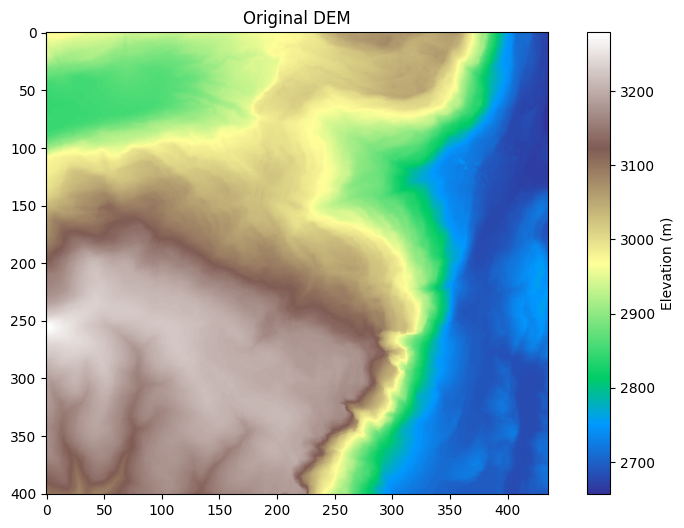

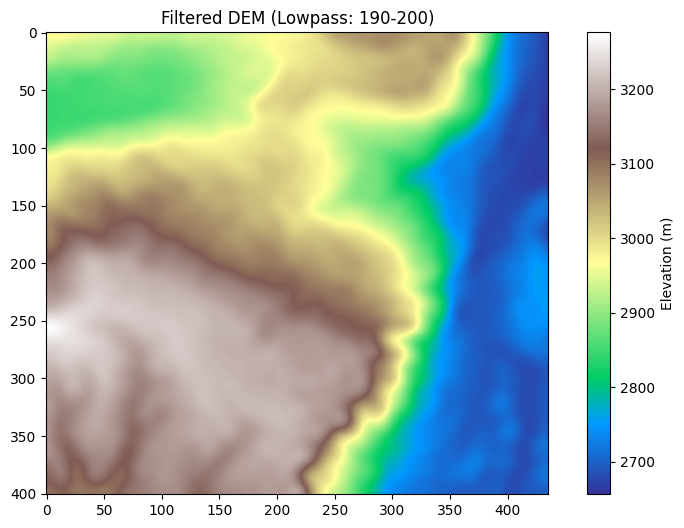

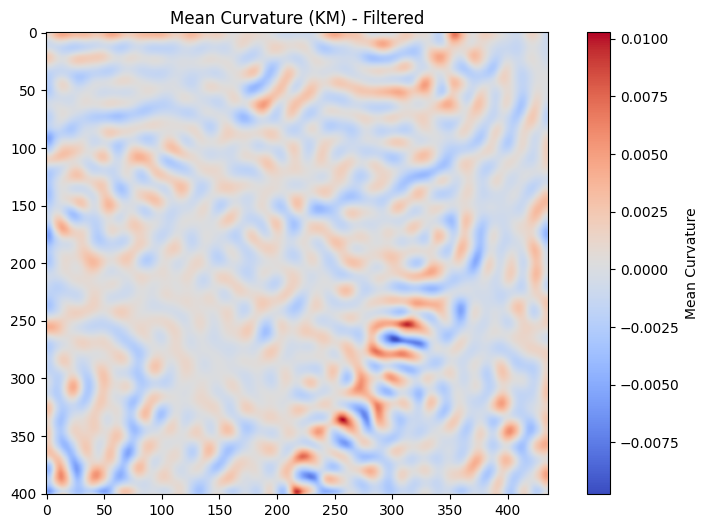

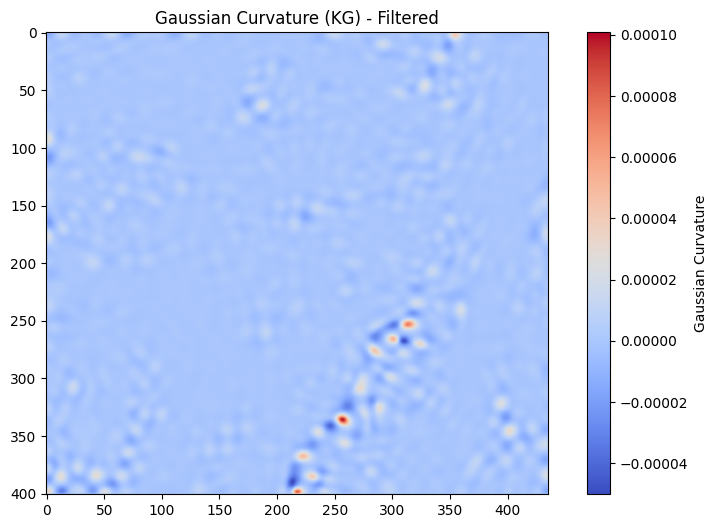

In [5]:
# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(dem.z_array, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Original DEM')
plt.show()

# Plot the filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(filtered_elevation, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 190-200)')
plt.show()

# Plot Mean Curvature (KM)
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Filtered')
plt.show()

# Plot Gaussian Curvature (KG)
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Filtered')
plt.show()


5. Second Filtering (Lowpass: [90, 100])

In [6]:
dx, dy, ZFilt = spectral_filter.FFT([90, 100], "lowpass", 0.5)

# Compute curvature attributes again
K1, K2, KM, KG = dem.CurveCalc(ZFilt, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG) for second filtering:")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG) for second filtering:
[[ 0.00686834  0.00672602  0.00648564 ...  0.00210727  0.00185854
   0.00188004]
 [ 0.00873713  0.00859343  0.00835565 ...  0.00246028  0.00228399
   0.00232055]
 [ 0.00778155  0.00776366  0.00779474 ...  0.00239021  0.00191625
   0.00182001]
 ...
 [-0.00519731 -0.00650177 -0.00532671 ...  0.00416563  0.00445501
   0.00338253]
 [-0.00540221 -0.00676046 -0.00549112 ...  0.00384126  0.00419789
   0.00320365]
 [-0.00548019 -0.00657652 -0.00550347 ...  0.00368227  0.00406129
   0.00310605]] [[-2.30010017e-03 -2.83238833e-03 -2.11709925e-03 ...  9.52627564e-04
   6.28424089e-04  3.16414117e-04]
 [-2.51820408e-03 -3.14140560e-03 -2.47861833e-03 ...  7.87664930e-04
   4.39592470e-04  1.81207291e-04]
 [-2.88421790e-03 -3.66862950e-03 -3.13460207e-03 ...  5.18475909e-05
  -5.01620296e-05 -1.28100962e-04]
 ...
 [-9.10299875e-03 -9.10570015e-03 -8.99958631e-03 ... -7.60985162e-03
  -7.87540848e-03 -8.01704969e-03]
 [-9.04716665e-03 -9.005646

6. Plot and Save Second Filtered Results

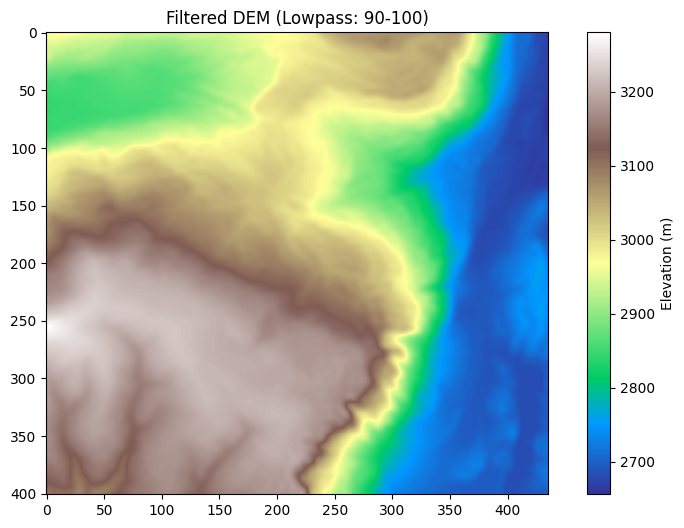

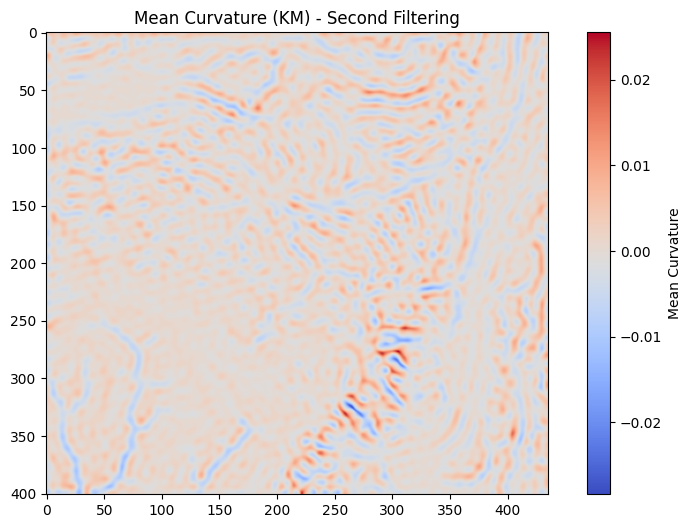

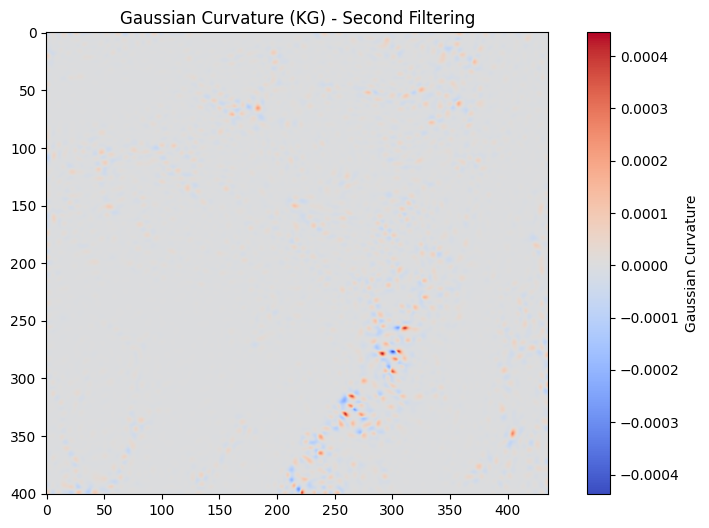

In [7]:
# Save the FFT filtered DEM
dem.plot(ZFilt, "fftdem.png")

# Plot the second filtered elevation values
plt.figure(figsize=(10, 6))
plt.imshow(ZFilt, cmap='terrain')
plt.colorbar(label='Elevation (m)')
plt.title('Filtered DEM (Lowpass: 90-100)')
plt.show()

# Plot Mean Curvature (KM) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KM, cmap='coolwarm')
plt.colorbar(label='Mean Curvature')
plt.title('Mean Curvature (KM) - Second Filtering')
plt.show()

# Plot Gaussian Curvature (KG) for the second filtered data
plt.figure(figsize=(10, 6))
plt.imshow(KG, cmap='coolwarm')
plt.colorbar(label='Gaussian Curvature')
plt.title('Gaussian Curvature (KG) - Second Filtering')
plt.show()
